In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import lil_matrix
from scipy.sparse.linalg import spsolve
from numpy.linalg import solve


In [24]:
omega = 5.0

In [25]:
def u_exact(x, omega):
    A = np.array([
        [1.0, 1.0],
        [np.exp(omega), np.exp(-omega)]
    ])
    b = np.array([
        -2.0 / omega**4,
        -1.0 / omega**2 - 2.0 / omega**4
    ])
    C1, C2 = solve(A, b)

    return (
        C1 * np.exp(omega * x)
        + C2 * np.exp(-omega * x)
        + x**2 / omega**2
        + 2.0 / omega**4
    )

In [26]:
def helmholtz_c0(x, omega):
    N = len(x) - 1
    h = np.diff(x)

    #A = np.zeros((N-1, N-1))
    A = lil_matrix((N-1, N-1))
    b = np.zeros(N-1)

    for i in range(N-1):
        hi = h[i]

        # stiffness
        A[i, i] = 2/hi + omega**2 * 2 * hi / 3

        if i > 0:
            A[i, i-1] = -1/hi + omega**2 * hi / 6

        if i < N-2:
            A[i, i+1] = -1/hi + omega**2 * hi / 6

        # load vector 
        xL, xi, xR = x[i-1], x[i], x[i+1]

        if(i>1):

            bi = ((xR - xL) * xi**2 - (xi + xL) * xL**2 + (xi + xR) * xR**2) / 12

        # bi = (xi**2 + xL**2) * (xi + xL) / 4 - (xL) * (xi**2 + xL**2 + xi * xL) / 3 + (xR) * (xi**2 + xR**2 + xi * xR) / 3 - (xi**2 + xR**2) * (xi + xR) / 4

            b[i] = bi
            
    A = A.tocsr()
    u_inner = spsolve(A, b)

    u = np.zeros(N+1)
    u[1:-1] = u_inner
    return u


error = O(h^p)

loglogp vs logh

Implementation

setup stiffness matrix -> sparse

c0 elements: tridiagonal
c1 elements: each block A00, A01, A11 tri

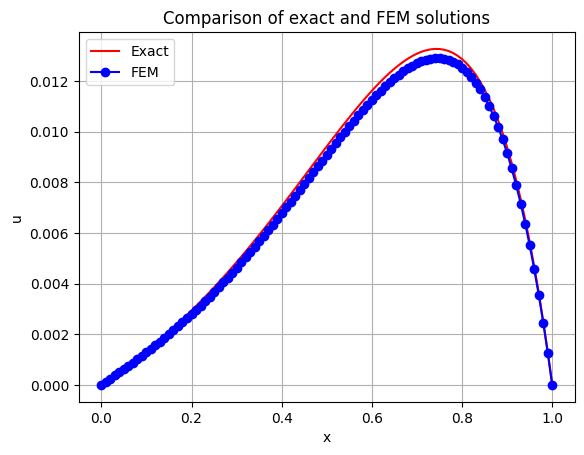

In [27]:
# plot u_exact and u_approx
n = 100
xx = np.linspace(0, 1, n+1)

u_fem_c0 = helmholtz_c0(xx, omega)

plt.plot(xx, u_exact(xx, omega), label="Exact", color='r')
plt.plot(xx, u_fem_c0, 'o-', label="FEM", color='b')

plt.xlabel("x")
plt.ylabel("u")
plt.legend()
plt.title("Comparison of exact and FEM solutions")
plt.grid(True)
plt.show()


Error (L-inf norm): 0.0003786476724661602


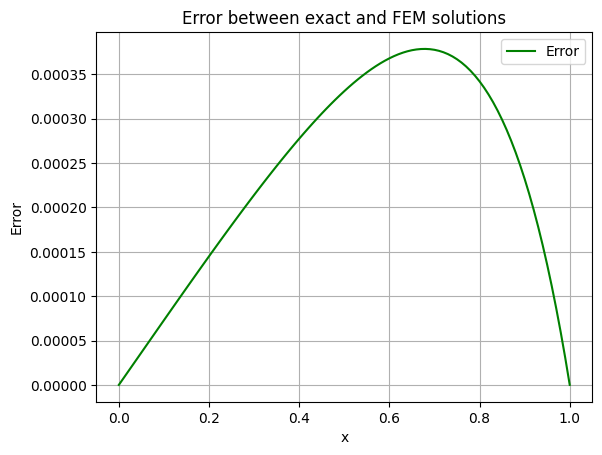

In [28]:
# calculate the error and plot it
error = np.linalg.norm(u_exact(xx, omega) - helmholtz_c0(xx, omega), ord=np.inf)
print(f"Error (L-inf norm): {error}")

plt.plot(xx, u_exact(xx, omega) - helmholtz_c0(xx, omega), label="Error", color='g')
plt.xlabel("x")
plt.ylabel("Error")
plt.legend()
plt.title("Error between exact and FEM solutions")
plt.grid(True)
plt.show()


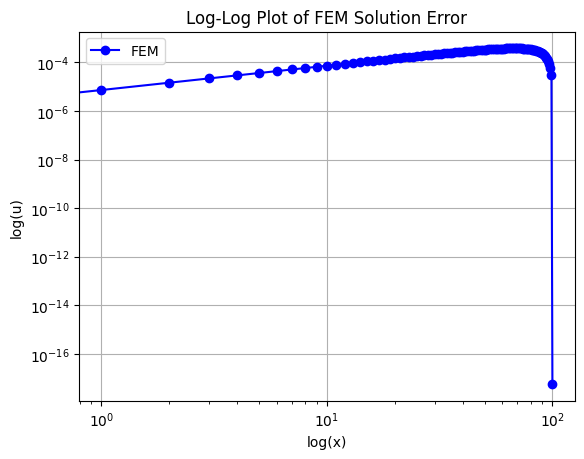

In [30]:
# plot log log
plt.loglog(np.abs(u_exact(xx, omega) - helmholtz_c0(xx, omega)), 'o-', label="FEM", color='b')
plt.xlabel("log(x)")
plt.ylabel("log(u)")
plt.title("Log-Log Plot of FEM Solution Error")
plt.grid(True)
plt.legend()
plt.show()
